# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [11]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [12]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

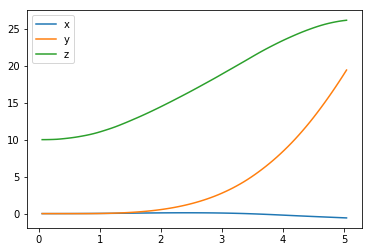

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

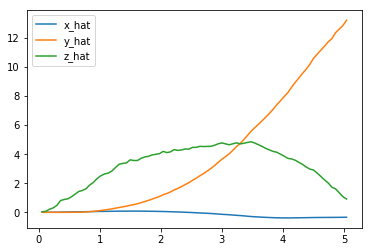

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

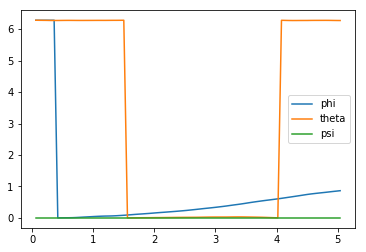

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

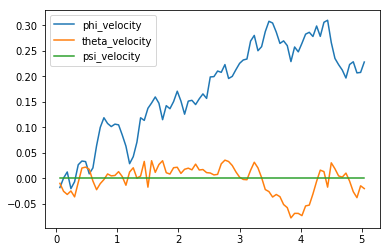

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

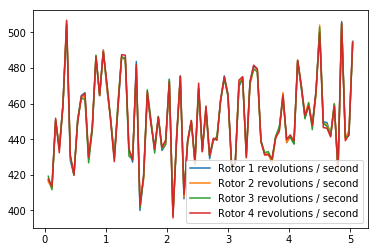

In [17]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [18]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.58370452 19.41373147 26.14858246  0.86512437  6.27429041  0.        ]
[-0.34000624 13.21590292  0.91443553]
[ 0.22802307 -0.02012441  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [19]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.373 (best =  -0.164), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
import pandas as pd
from takeoff_task import Task
from agents.agent import DDPG
import csv
import numpy as np


num_episodes = 300
target_pos = np.array([0., 0., 2.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 
worst_score = 1000000
best_score = -1000000.
reward_log = "reward.txt"

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        
        if done:
            print("The reward after {} episode is {}".format(i_episode, agent.total_reward))
            break

    sys.stdout.flush()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
The reward after 1 episode is 81.57480709610951
The reward after 2 episode is 81.5748878770235
The reward after 3 episode is 81.57457199154375
The reward after 4 episode is 81.57468051625207
Instructions for updating:
Use tf.cast instead.
The reward after 5 episode is -41.12934982005598
The reward after 6 episode is 24.794792497558944
The reward after 7 episode is -175.18555401782146
The reward after 8 episode is -97.86396177673089
The reward after 9 episode is 58.803335870286276
The reward after 10 episode is -97.91170719460501
The reward after 11 episode is 20056.75423161938
The reward after 12 episode is 20056.755823730608
The reward after 13 episode is 30056.757186486888
The reward after 14 episode is 30056.75742063987
The reward after 15 episode is 10045.407039807742
The reward after 16 episode is 10045.407528090676
The reward after 17 episode is 10045.40788342989
The reward after 18 episode is 10045.408075175

The reward after 153 episode is 10045.408304047682
The reward after 154 episode is 10045.408300188332
The reward after 155 episode is 10045.408302860058
The reward after 156 episode is 10045.408299525061
The reward after 157 episode is 10045.408302844999
The reward after 158 episode is 10045.408301492662
The reward after 159 episode is 10045.408301917145
The reward after 160 episode is 10045.408300929845
The reward after 161 episode is 10045.408300297871
The reward after 162 episode is 10045.408299342127
The reward after 163 episode is 10045.408302950858
The reward after 164 episode is 10045.408298319606
The reward after 165 episode is 10045.408298295599
The reward after 166 episode is 10045.408299460776
The reward after 167 episode is 10045.408299848748
The reward after 168 episode is 10045.40829888306
The reward after 169 episode is 10045.4082993429
The reward after 170 episode is 10045.40829941775
The reward after 171 episode is 10045.408298962511
The reward after 172 episode is 100

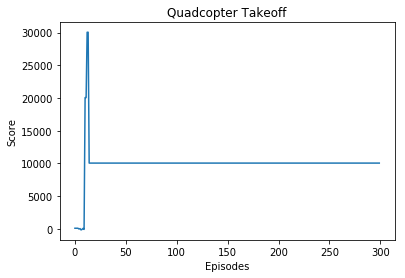

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(agent.rewards))
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title("Quadcopter Takeoff")
plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [9]:
%load_ext autoreload
%autoreload 2


runtime = 5000.                                  
init_velocities = np.array([0., 0., 0.])         
init_angle_velocities = np.array([0., 0., 0.])   
file_output = 'data.txt'                         

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}


state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Total episode reward : 10045.408300735959


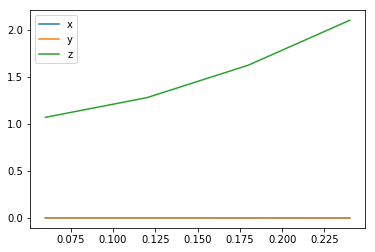

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task that was specified was a version of takeoff. I created an objective of getting from z = 2 initiating from z = 1. 

There were three steps in my reward function:

1) The first step was to give a reward based on the distance from the target. The reward was composed of a part bounded between -1 and +1 by using tanh summed by a fixed 1.5, so that I always had a positive reward (this has increased the convergence). 

2) The second term was to penalize the agent if it crashed. To do it, I had a big negative reward (-100) and I immediately stopped the agent.

3) The last part was a big reward (+10000) if the agent had obtained the target by passing z = 2. This also immediately stopped the agent.

There was a lot of trial in error in finding the correct functions and weights for the convergence and learning of the agent. The full code for the reward is as follows:

``` def get_reward(self):

        done = False
        reward = (np.tanh(1 - 0.003*(abs(self.sim.pose[:3] - self.target_pos))).sum()) + 1.5
               
        if self.sim.runtime > self.sim.time:
            if self.sim.done:
                #print('Crashed')
                reward = reward  -100 #-100
                done = True
            elif self.sim.pose[2] >= self.target_pos[2]:
                #print('Atingiu')
                #print(self.sim.pose[2])
                reward = reward + 10000 
                done = True ```

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?

I used the actor-critic method DDPG (Deep Deterministic Policy Gradients), based on the Udacity implementation.

<br>
<br>

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

After extensive searching, the best hyperparameters that I found was:

Algorithm parameters:
*Gamma:* 0.99
*Tau:* 0.01

Noise parameters:
*Exploration_mu:*  0
*Exploration_theta:* 0.15
*Exploration_sigma:* 0.2

Neural network parameters:
*Learning rate:* 0.001

<br>
<br>


- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

For the actor, I used a deep network composed of three fully connected layers using relu activation functions and composed of 32, 64 and 32 layers. Then a final layer of 4 neurons (action_size) with a sigmoid activation followed by a scaling of actions in the action range. To train this network I used an Adam optimizer.

For the critic part, I used a network composed of two pathways (state and action), each one composed by two fully connected layers of 32 and 64 units with a relu activation. After those two I merged the two pathways and added a relu activation. This network was also trained using an Adam optimizer.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Looking to the episode rewards plot, the task was easy to learn by the agent because it quickly (15 episodes) learned the correct actions to go the target and not crash and kept in that baseline.

The learning was not gradual, in the first episodes the agent was searching for different action without a continuous increase in the reward (it has even decreased from some episode to another), but after the aha moment near episode 15 it found the best action and kept there.

The final reward of the agent was very good, because it learned to quickly go to its target.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This project was by far the most difficulty project in this nanodegree. There were two very difficult moments: the first one was to begin, because the project was a big step from the last mini projects on the section of Reinforcement Learning. 

After it, the second and hardest moment was after definying the basic functions (task and agent) the training was not converging in no way, and the agent was learning a set of actions totally different from the specification (for example, increasing the y or the x coordinate but not z). To solve this I first spent a lot of time tweaking the agent and the network specification (like the number of layers, units in each layer, batch normalization, dropout and so on) but nothing seemed to help except for decreasing the learning rate to 0.001. After this, I went back to the simple network described above (so it was faster to train and iterate) and started tweaking the task, by adding the penalty for crashing, for getting to the target and finally changed a lot of the weights until I get those good results.

One important lesson of this project for me was that reinforcement learning as a hard task/field, that demands a lot of trial and error and knowledge about the system that you are trying to model and train.